In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# import data with no missing values
df = pd.read_csv('../data/clean_data.csv')

In [19]:
df.head()

,PassengerId,HomePlanet,CryoSleep,CabinDeck,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxurySpend,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,True


In [20]:
df_feat = df.drop('PassengerId', axis=1)

In [21]:
# binary encode
for col in ['CryoSleep', 'VIP', 'Transported']:
    df_feat[col] = df_feat[col].map({True: 1, False: 0})

In [22]:
df_feat = pd.get_dummies(df_feat, drop_first=True)

In [23]:
trans_col = df_feat.pop('Transported')
df_feat.insert(20, 'Transported', trans_col)

In [24]:
df_feat

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LuxurySpend,HomePlanet_Europa,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,736.0,0,...,0,0,0,0,1,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1091.0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,8536.0,1,...,0,0,0,0,0,0,0,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,1,0,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1873.0,0,...,0,0,0,0,0,1,0,0,1,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4637.0,1,...,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

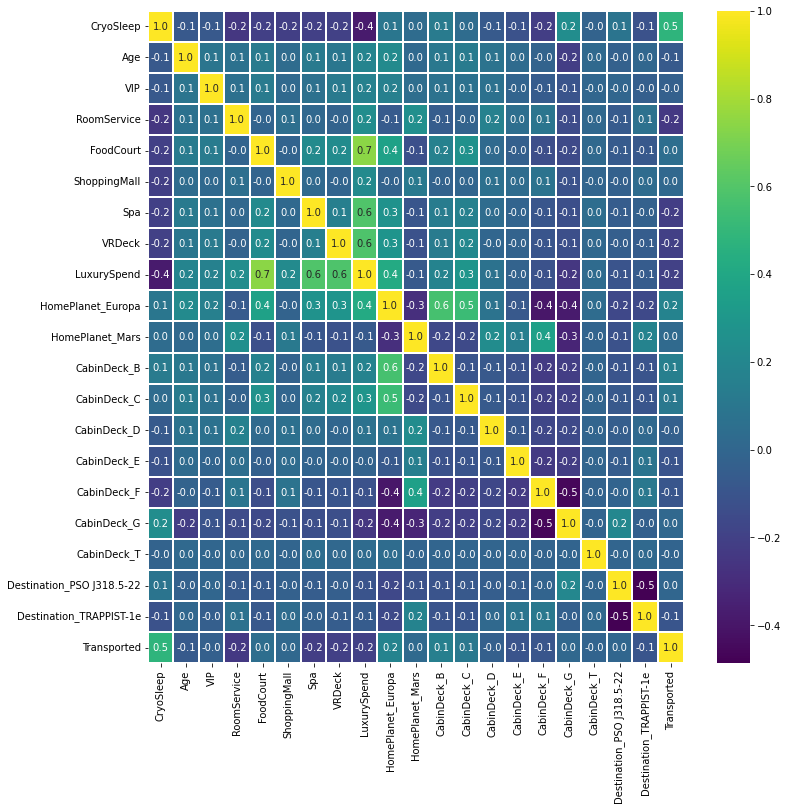

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df_feat.corr(),
            cmap='viridis', 
            linewidths=0.1, 
            annot=True,
            fmt=".1f",     
            annot_kws={"size":10})

In [28]:
def age_bins(age):
    if age < 13:
        return 0
    elif age < 19:
        return 1
    elif age < 25:
        return 2
    elif age < 30:
        return 3
    elif age < 40:
        return 4
    elif age < 50:
        return 5
    else: 
        return 6

df_feat['Age'] = df_feat['Age'].apply(age_bins)

<AxesSubplot:xlabel='Age', ylabel='count'>

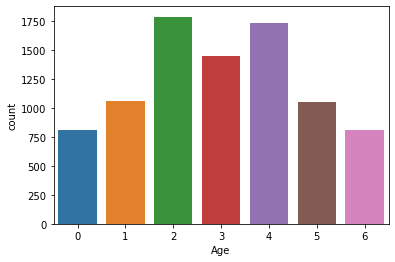

In [29]:
sns.countplot(data=df_feat, x='Age')

In [30]:
df_feat.to_csv('../data/features.csv', index=False)